In [0]:
from argparse import Namespace
import matplotlib.pyplot as plt
import numpy as np
import random
import torch

# Arguments
args=Namespace(
    seed=1234,
    num_samples_per_class=500,#每个类别里的样本数
    dimensions=2,#
    num_classes=3,#类别数
    train_size=0.75,
    test_size=0.25,
    num_hidden_units=100,
    learning_rate=1e-0,
    regularization=1e-3,
    num_epochs=200,
)

np.random.seed(args.seed)

In [0]:
#generate non-linear data
def generate_data(num_samples_per_class,dimensions,num_classes):
    #spiral data
    X_original=np.zeros((num_samples_per_class*num_classes,dimensions))#生成（a,b）
    y=np.zeros(num_samples_per_class*num_classes,dtype='uint8')#生成(a,)
    for j in range(num_classes):
        ix=range(num_samples_per_class*j,num_samples_per_class*(j+1))#生成a到b的整数，此处作为索引
        r=np.linspace(0.0,1,num_samples_per_class)#半径 在0,1之间生成num_samples_per_class个数 (num_samples_per_class, )
        #theta
        t=np.linspace(j*4,(j+1)*4,num_samples_per_class)+np.random.randn(num_samples_per_class)*0.2 #random.randn(a) 生成a个整数 （a, ）
        #X_original的每（num_samples_per_class，2）作为一个类别的样本
        X_original[ix]=np.c_[r*np.sin(t),r*np.cos(t)]
        #y的每（num_samples_per_class，）是一类，标签设为j
        y[ix]=j
    X=np.hstack([X_original])

    return X,y

In [52]:
X,y=generate_data(args.num_samples_per_class,args.dimensions,args.num_classes)
print("X:{0}".format(np.shape(X)))
print("y:{0}".format(np.shape(y)))

X:(1500, 2)
y:(1500,)


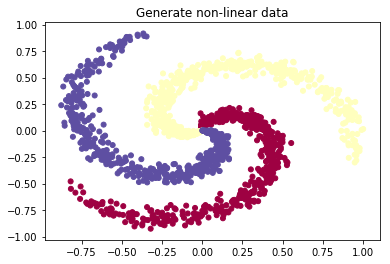

In [53]:
plt.title("Generate non-linear data")
#没有设置c参数的话，所有点的颜色相同。
#spectral光谱的
plt.scatter(X[:,0],X[:,1],c=y,s=25,cmap=plt.cm.Spectral)
plt.show()

**1. basic syntax**

----np.random.sample(list,  5) 从list中随机取5个元素，原序列不变

---同时shuffle两个序列

randnum = random.randint(0,100)

random.seed(randnum)

random.shuffle(train_x)

random.seed(randnum)

random.shuffle(train_y)

In [54]:
#convert X,y to Pytorch tensors
X=torch.from_numpy(X).float()
y=torch.from_numpy(y).long()

#shuffle
shuffle_indice=torch.LongTensor(random.sample(range(0,len(X)),len(X)))
X=X[shuffle_indice]
y=y[shuffle_indice]

#split datasets
test_start_idx=int(len(X)*args.train_size)
X_train=X[:test_start_idx]#equal to [0:test_start_idx,:]
y_train=y[:test_start_idx]
X_test=X[test_start_idx:]#equal to [test_start_idx:,:]
y_test=y[test_start_idx:]
print("train samples:%i,test samples:%i"%(len(X_train),len(X_test)))


train samples:1125,test samples:375


In [55]:
print(y_train.shape)

torch.Size([1125])


In [44]:
#同时shuffle两个序列
list1=[1,2,3,4,5,6,7]
list2=[1,2,3,4,5,6,7]

randnum = random.randint(0,100)

random.seed(randnum)

random.shuffle(list1)

print(list1)

random.seed(randnum)

random.shuffle(list2)

print(list2)


[6, 1, 4, 2, 5, 7, 3]
[6, 1, 4, 2, 5, 7, 3]


**2.**

import torch.nn

import torch.nn.functional as F

**3.**

torch.nn.linear(in,out,bias=True)

https://pytorch.org/docs/stable/nn.html#linear-layers

in ---输入的个数
out---输出的个数
y=xA'+b

A=(in, out)

b=(out, 1)






torch.optim.adam

https://pytorch.org/docs/stable/optim.html?highlight=torch%20optim%20adam#torch.optim.Adam

torch.eq(input,other,out=None) --->tensor

https://pytorch.org/docs/stable/torch.html?highlight=torch%20eq#torch.eq

input--tensor

other--tensor or float

out--ByteTensor



In [45]:
import torch
import torch.nn as nn
m=nn.Linear(2,3)
input=torch.randn(4,2)
output=m(input)
print(m.weight)
print(m.bias)
print(input)
print(output)
input=torch.randn(1,2)
output=m(input)
print(input)
print(output)

Parameter containing:
tensor([[-0.2932, -0.0422],
        [ 0.6532,  0.5029],
        [-0.5456,  0.2509]], requires_grad=True)
Parameter containing:
tensor([-0.7040,  0.5638, -0.4170], requires_grad=True)
tensor([[ 0.4100, -0.9029],
        [-0.6989,  0.6609],
        [-0.6125, -0.8337],
        [ 0.2230,  1.3341]])
tensor([[-0.7861,  0.3775, -0.8672],
        [-0.5269,  0.4396,  0.1302],
        [-0.4892, -0.2556, -0.2920],
        [-0.8256,  1.3804, -0.2039]], grad_fn=<AddmmBackward>)
tensor([[0.9102, 0.4916]])
tensor([[-0.9915,  1.4056, -0.7903]], grad_fn=<AddmmBackward>)


In [0]:
#####################################################################
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset,DataLoader
from tqdm import tqdm_notebook

#Linear Model
class LogisticClassifier(nn.Module): #LogisticClassifier 继承nn.Module
    def __init__(self, input_dim, hidden_dim, out_dim):
        super(LogisticClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, out_dim)

    def forward(self, x_in, apply_softmax=False):
        a_1 = self.fc1(x_in)
        y_pred = self.fc2(a_1)

        if apply_softmax:
            y_pred = F.softmax(y_pred, dim=1)#将得到的输出通过softmax函数，得到[0,1]之间的值

        return y_pred

In [57]:
####################################################################################Initialize Model
# Initialize model
model = LogisticClassifier(input_dim=args.dimensions, 
                           hidden_dim=args.num_hidden_units, 
                           out_dim=args.num_classes)
print (model.named_modules)

<bound method Module.named_modules of LogisticClassifier(
  (fc1): Linear(in_features=2, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=3, bias=True)
)>


In [43]:
model=LogisticClassifier(input_dim=2,hidden_dim=3,out_dim=4)
print(model.named_modules)
x=torch.randn(2)
print(x)
print(model.forward(torch.randn(2)))
print(model.fc1.weight)

<bound method Module.named_modules of LogisticClassifier(
  (fc1): Linear(in_features=2, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=4, bias=True)
)>
tensor([-2.2150, -0.0958])
tensor([-0.7758, -0.2895,  0.7098, -0.0166], grad_fn=<AddBackward0>)
Parameter containing:
tensor([[ 0.0262, -0.2262],
        [-0.4460, -0.2673],
        [-0.5635,  0.6683]], requires_grad=True)


In [0]:
####################################################################################################optimization
# Optimization
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=args.learning_rate) # Adam optimizer (usually better than SGD)

# Accuracy
   #比较y_pred和y_target中的相对应的位置的值是否一致
    #得到与y_pred相同的形状的数据
     #.item()将数据转化python数据
def get_accuracy(y_pred, y_target):
    n_correct = torch.eq(y_pred, y_target).sum().item()   
    accuracy = n_correct / len(y_pred) * 100
    return accuracy

In [59]:
y_pred=model(X_train)
print(y_pred.shape,y_pred.type())

_,predictions=y_pred.max(dim=1)
print(predictions.shape,predictions.type())

print(y_train.shape,y_train.type())

torch.Size([1125, 3]) torch.FloatTensor
torch.Size([1125]) torch.LongTensor
torch.Size([1125]) torch.LongTensor


In [60]:
# Training
for t in range(args.num_epochs):
    y_pred = model(X_train) #####前向计算，获得预测值
    
    _, predictions = y_pred.max(dim=1)###得到类别
    accuracy = get_accuracy(y_pred=predictions.long(), y_target=y_train)##计算精度

    
    loss = loss_fn(y_pred, y_train)  #####计算预测值和真实值之间的损失
    
   
    if t%20==0: 
        print ("epoch: {0:02d} | loss: {1:.4f} | acc: {2:.1f}%".format(
            t, loss, accuracy))

    
    optimizer.zero_grad()  ####在每次进行向后反馈的时候需要清空梯度，不然不会收敛

    loss.backward()  ####求出最快的收敛方向

    optimizer.step()   ####更新权重

epoch: 00 | loss: 1.0793 | acc: 44.7%
epoch: 20 | loss: 22.2573 | acc: 55.7%
epoch: 40 | loss: 5.4529 | acc: 53.1%
epoch: 60 | loss: 2.0905 | acc: 58.2%
epoch: 80 | loss: 0.8329 | acc: 57.8%
epoch: 100 | loss: 0.7572 | acc: 61.2%
epoch: 120 | loss: 0.7303 | acc: 54.4%
epoch: 140 | loss: 0.7290 | acc: 53.9%
epoch: 160 | loss: 0.7289 | acc: 54.0%
epoch: 180 | loss: 0.7289 | acc: 53.8%


In [0]:
_,pred_train=model(X_train,apply_softmax=True).max(dim=1)
_,pred_test=model(X_test,apply_softmax=True).max(dim=1)

In [62]:
#Train and test accuracies
train_acc=get_accuracy(y_pred=pred_train,y_target=y_train)
test_acc=get_accuracy(y_pred=pred_test,y_target=y_test)
print("train acc:{0},test acc:{1}".format(train_acc,test_acc))

train acc:53.955555555555556,test acc:53.86666666666666


In [63]:
print(X.shape)

torch.Size([1500, 2])


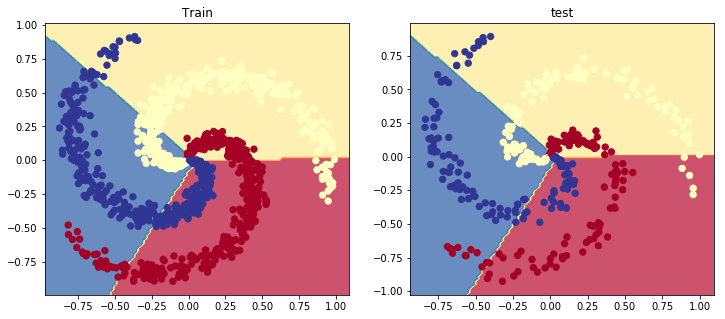

In [110]:
#Visulization
def plot_multiclass_decision_boundary(model,X,y):
    x_min,x_max=X[:,0].min()-0.1, X[:,0].max()+0.1
    y_min,y_max=X[:,1].min()-0.1, X[:,1].max()+0.1#get the 0 and 1 column in X respectively
    #draw a grid
    xx,yy=np.meshgrid(np.linspace(x_min,x_max,101),np.linspace(y_min,y_max,101))
    cmap=plt.cm.Spectral

    X_test=torch.from_numpy(np.c_[xx.ravel(),yy.ravel()]).float()
    y_pred=model(X_test,apply_softmax=True)
    _,y_pred=y_pred.max(dim=1)
    y_pred=y_pred.reshape(xx.shape)
   
    #print("xx:",xx)
    #print("yy:",yy)
    #print("y_pred:",y_pred)
    #print("-----------------------------------------------")
    #xx1,yy1=np.meshgrid(np.linspace(-2,2,101),np.linspace(-3,3,101))
    plt.contourf(xx,yy,y_pred,cmap=plt.cm.Spectral,alpha=0.8)

    plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Train")
plot_multiclass_decision_boundary(model=model,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_multiclass_decision_boundary(model=model,X=X_test,y=y_test)
plt.show()


In [103]:
print(torch.from_numpy(np.random.rand(1125,3)).shape)

x_min,x_max=X[:,0].min()-0.1, X[:,0].max()+0.1
y_min,y_max=X[:,1].min()-0.1, X[:,1].max()+0.1
print(x_min,x_max,y_min,y_max)

torch.Size([1125, 3])
tensor(-0.9759) tensor(1.0999) tensor(-1.0261) tensor(1.0155)


In [0]:
import itertools
from sklearn.metrics import confusion_matrix,classification_report

# Plot confusion matrix
def plot_confusion_matrix(cm, classes):
    cmap=plt.cm.Blues
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.grid(False)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", 
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


              precision    recall  f1-score   support

           0       0.53      0.46      0.49       119
           1       0.56      0.58      0.57       128
           2       0.52      0.57      0.54       128

    accuracy                           0.54       375
   macro avg       0.54      0.54      0.54       375
weighted avg       0.54      0.54      0.54       375



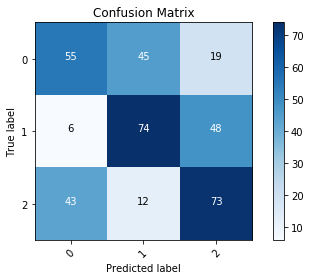

In [76]:
cm=confusion_matrix(y_test,pred_test)
plot_confusion_matrix(cm=cm,classes=[0,1,2])
print(classification_report(y_test,pred_test))

In [0]:
class MLP(nn.Module):
    def __init__(self,input_dim,hidden_dim,output_dim):
        super(MLP,self).__init__()
        self.fc1=nn.Linear(input_dim,hidden_dim)
        self.fc2=nn.Linear(hidden_dim,output_dim)

    def forward(self,x_in,apply_softmax=False):
      #在输入通过第一个函数时候，让输出结果再次通过一个非线性激活函数；
      #然后在将输出通过倒数第二层，也就是没有softmax之前的那一层
      #相当于多加了一层隐含层
        a_1=F.relu(self.fc1(x_in))
        y_pred=self.fc2(a_1)

        if apply_softmax:
            y_pred=F.softmax(y_pred)
        
        return y_pred


In [0]:
#先对模型初始化，因为优化器需要初始化之后的模型的参数
model_non=MLP(input_dim=args.dimensions,hidden_dim=args.num_hidden_units,output_dim=args.num_classes)

#optimization
loss_fn=nn.CrossEntropyLoss()
optimizer=optim.Adam(model_non.parameters(),lr=args.learning_rate)

In [82]:
#Training
for j in range(args.num_epochs):
    y_pred=model_non(X_train)

    _,predictions=y_pred.max(dim=1)
    accuracy=get_accuracy(y_pred=predictions,y_target=y_train)

    loss=loss_fn(y_pred,y_train)

    if j%20==0:
        print("epoch: {0:02d} | loss: {1:.4f} | acc: {2:.1f}%".format(
            j, loss, accuracy))
    
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

epoch: 00 | loss: 1.1113 | acc: 32.6%
epoch: 20 | loss: 0.5980 | acc: 72.4%
epoch: 40 | loss: 0.1964 | acc: 91.5%
epoch: 60 | loss: 0.0565 | acc: 98.0%
epoch: 80 | loss: 0.0330 | acc: 99.1%
epoch: 100 | loss: 0.0240 | acc: 99.4%
epoch: 120 | loss: 0.0188 | acc: 99.7%
epoch: 140 | loss: 0.0154 | acc: 99.8%
epoch: 160 | loss: 0.0133 | acc: 99.8%
epoch: 180 | loss: 0.0117 | acc: 99.9%


In [84]:
# Predictions
_, pred_train = model_non(X_train, apply_softmax=True).max(dim=1)
_, pred_test = model_non(X_test, apply_softmax=True).max(dim=1)

# Train and test accuracies
train_acc = get_accuracy(y_pred=pred_train, y_target=y_train)
test_acc = get_accuracy(y_pred=pred_test, y_target=y_test)
print ("train acc: {0:.1f}%, test acc: {1:.1f}%".format(train_acc, test_acc))

train acc: 99.9%, test acc: 98.9%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


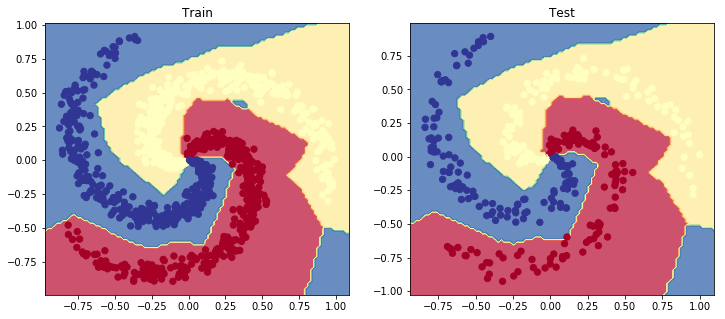

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       119
           1       1.00      0.99      1.00       128
           2       0.97      1.00      0.98       128

    accuracy                           0.99       375
   macro avg       0.99      0.99      0.99       375
weighted avg       0.99      0.99      0.99       375



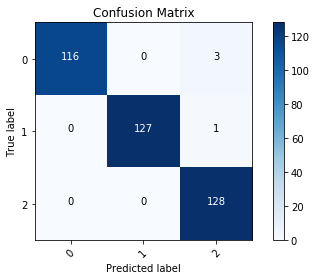

In [86]:
# Visualize the decision boundary
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_multiclass_decision_boundary(model=model_non, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_multiclass_decision_boundary(model=model_non, X=X_test, y=y_test)
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, pred_test)
plot_confusion_matrix(cm=cm, classes=[0, 1, 2])
print (classification_report(y_test, pred_test))